<a href="https://colab.research.google.com/github/Zhangz5534/CS491/blob/main/Top2VecPart2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
my_path="/content/drive/MyDrive/CS491/Data/"

# Load dataset from Hugging Face 🤗

In [3]:
!pip install datasets -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.7 MB/s eta 0:00:00


In [5]:
from datasets import load_dataset
import random

# Load the dataset
dataset = load_dataset("samsum",split='train').shuffle(seed=42)

#Take a random 3000 entries
random_subset= dataset.select(range(3000))

#Get the 'summary' field from the random subset
docs=random_subset['summary']

#Train Top2Vec model

In [6]:
!pip install top2vec -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 19.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 5.3 MB/s eta 0:00:00


In [7]:
##If model is already trained and saved (see section below) then this can be skipped!!
from top2vec import Top2Vec

# Assuming 'docs' is a list of text documents you wish to model
model = Top2Vec(docs, embedding_model='doc2vec', speed='deep-learn')
#fast-learn, learn, deep-learn


2024-03-31 22:26:55,810 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
2024-03-31 22:26:56,004 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2024-03-31 22:28:26,336 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2024-03-31 22:28:52,171 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2024-03-31 22:28:52,300 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


In [8]:
import pickle

# Save model
with open(my_path+'prompt_deep_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Topic modeling

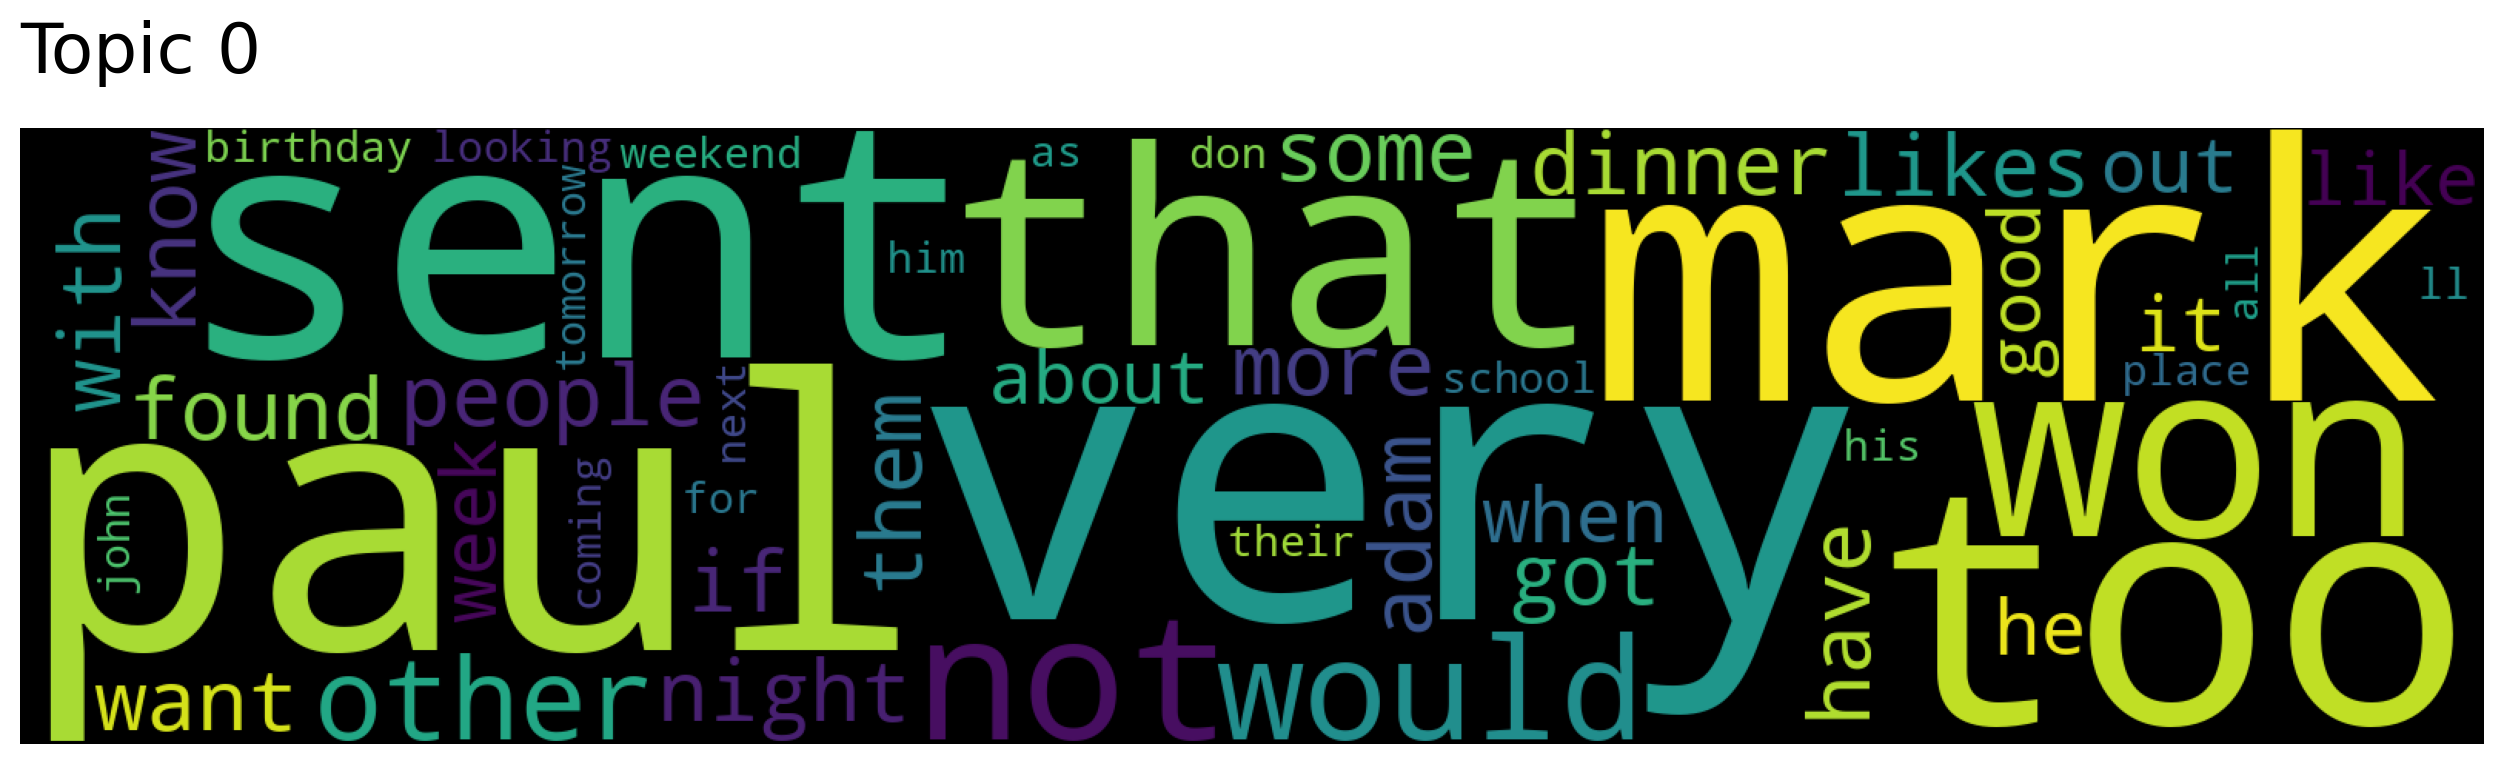

In [9]:
model.generate_topic_wordcloud(0)

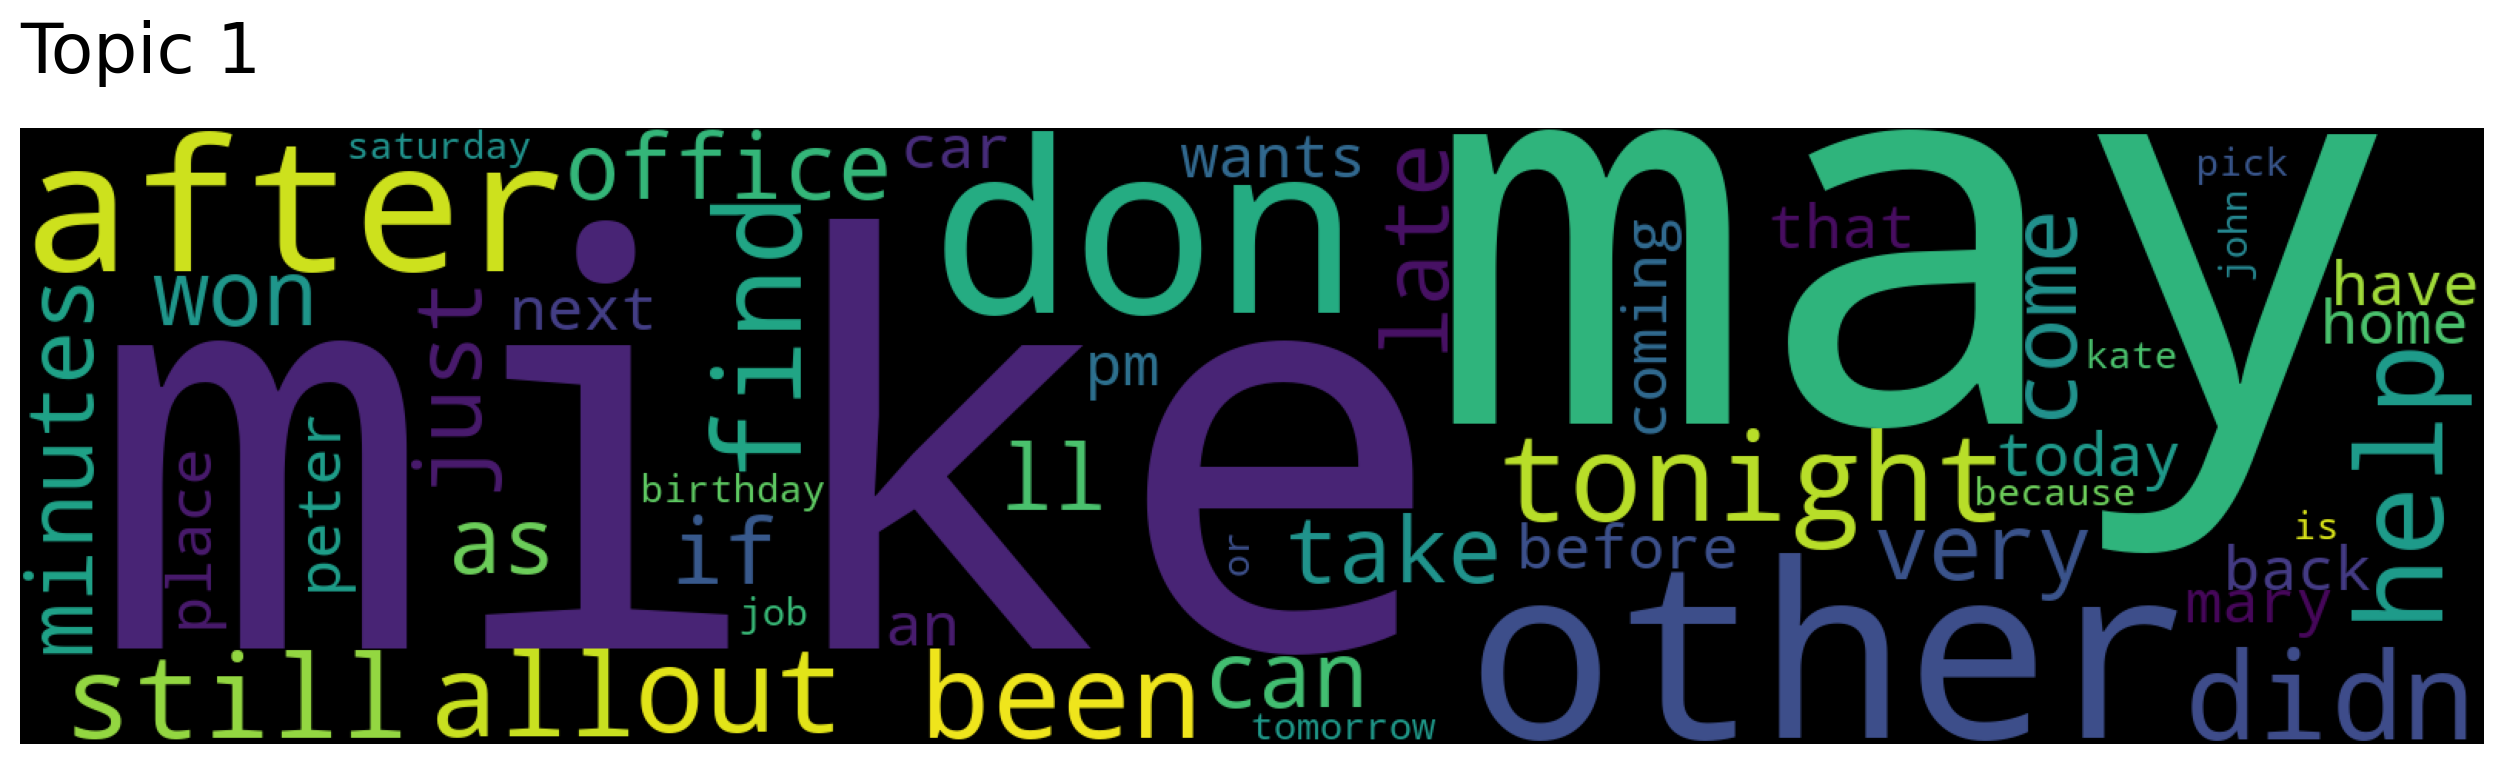

In [10]:
model.generate_topic_wordcloud(1)

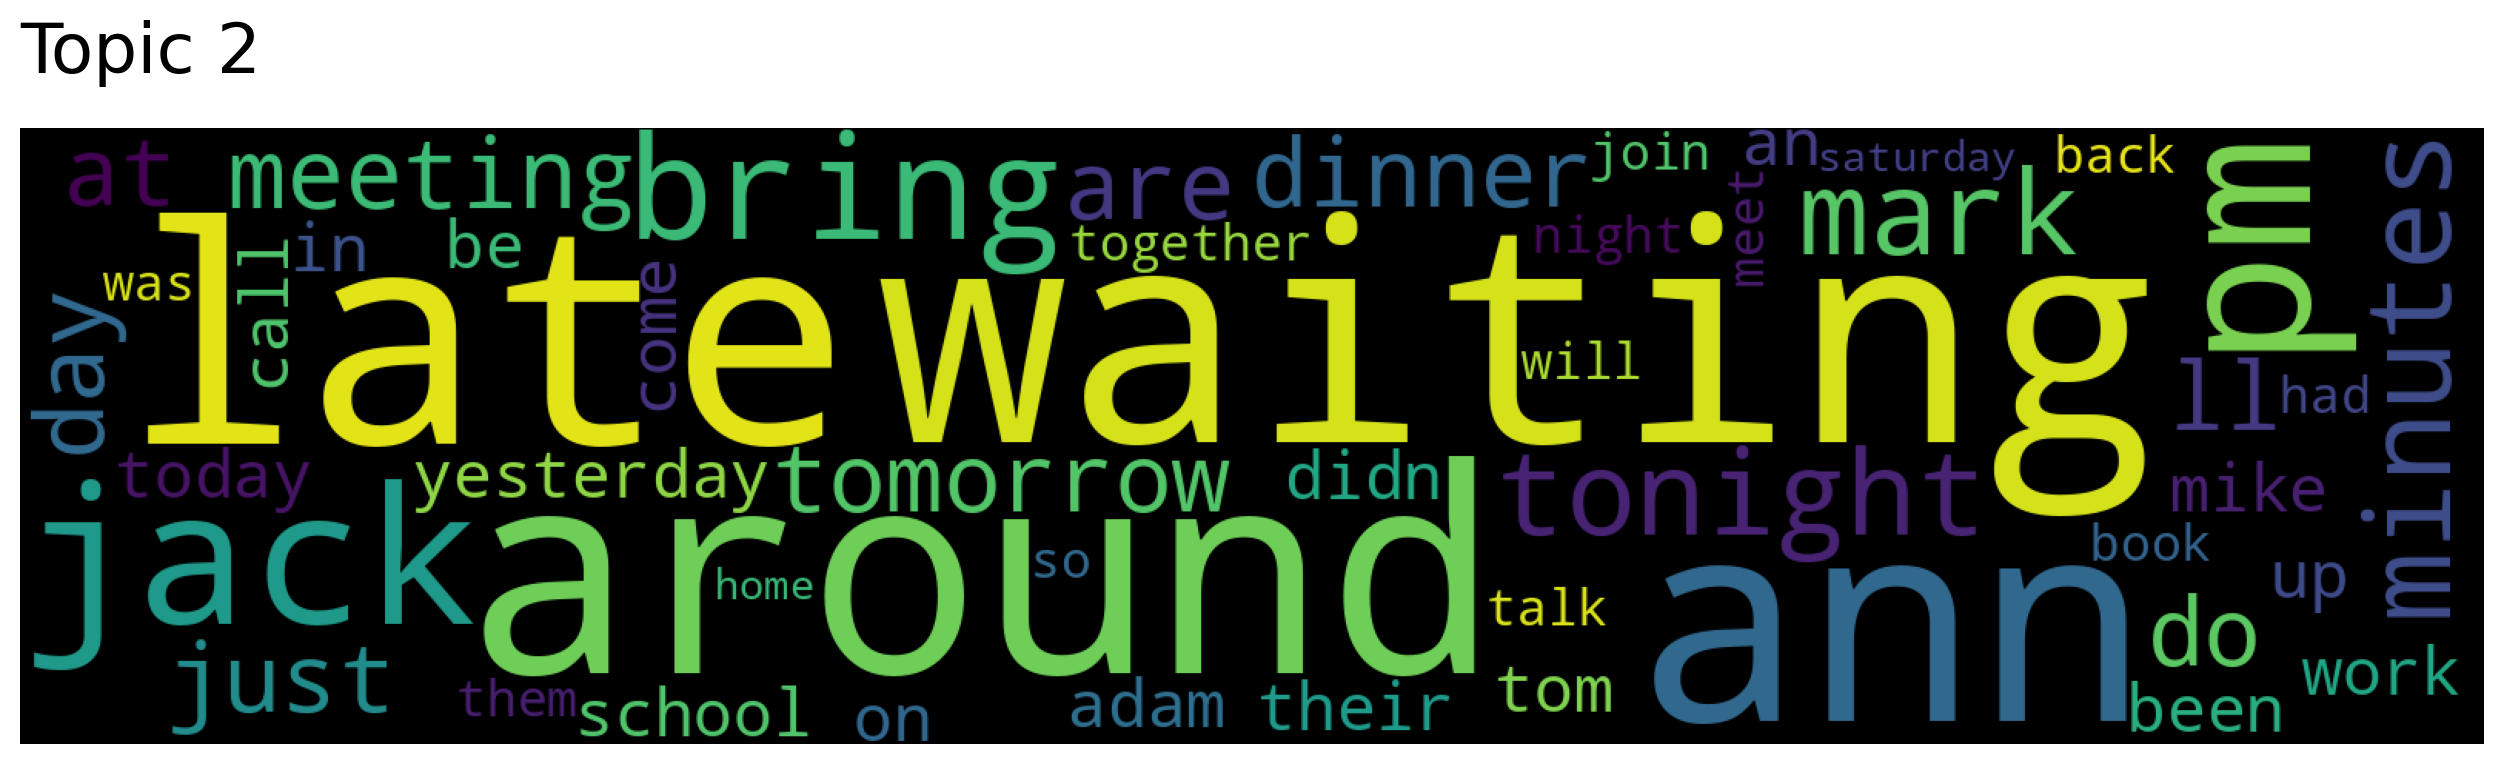

In [11]:
model.generate_topic_wordcloud(2)

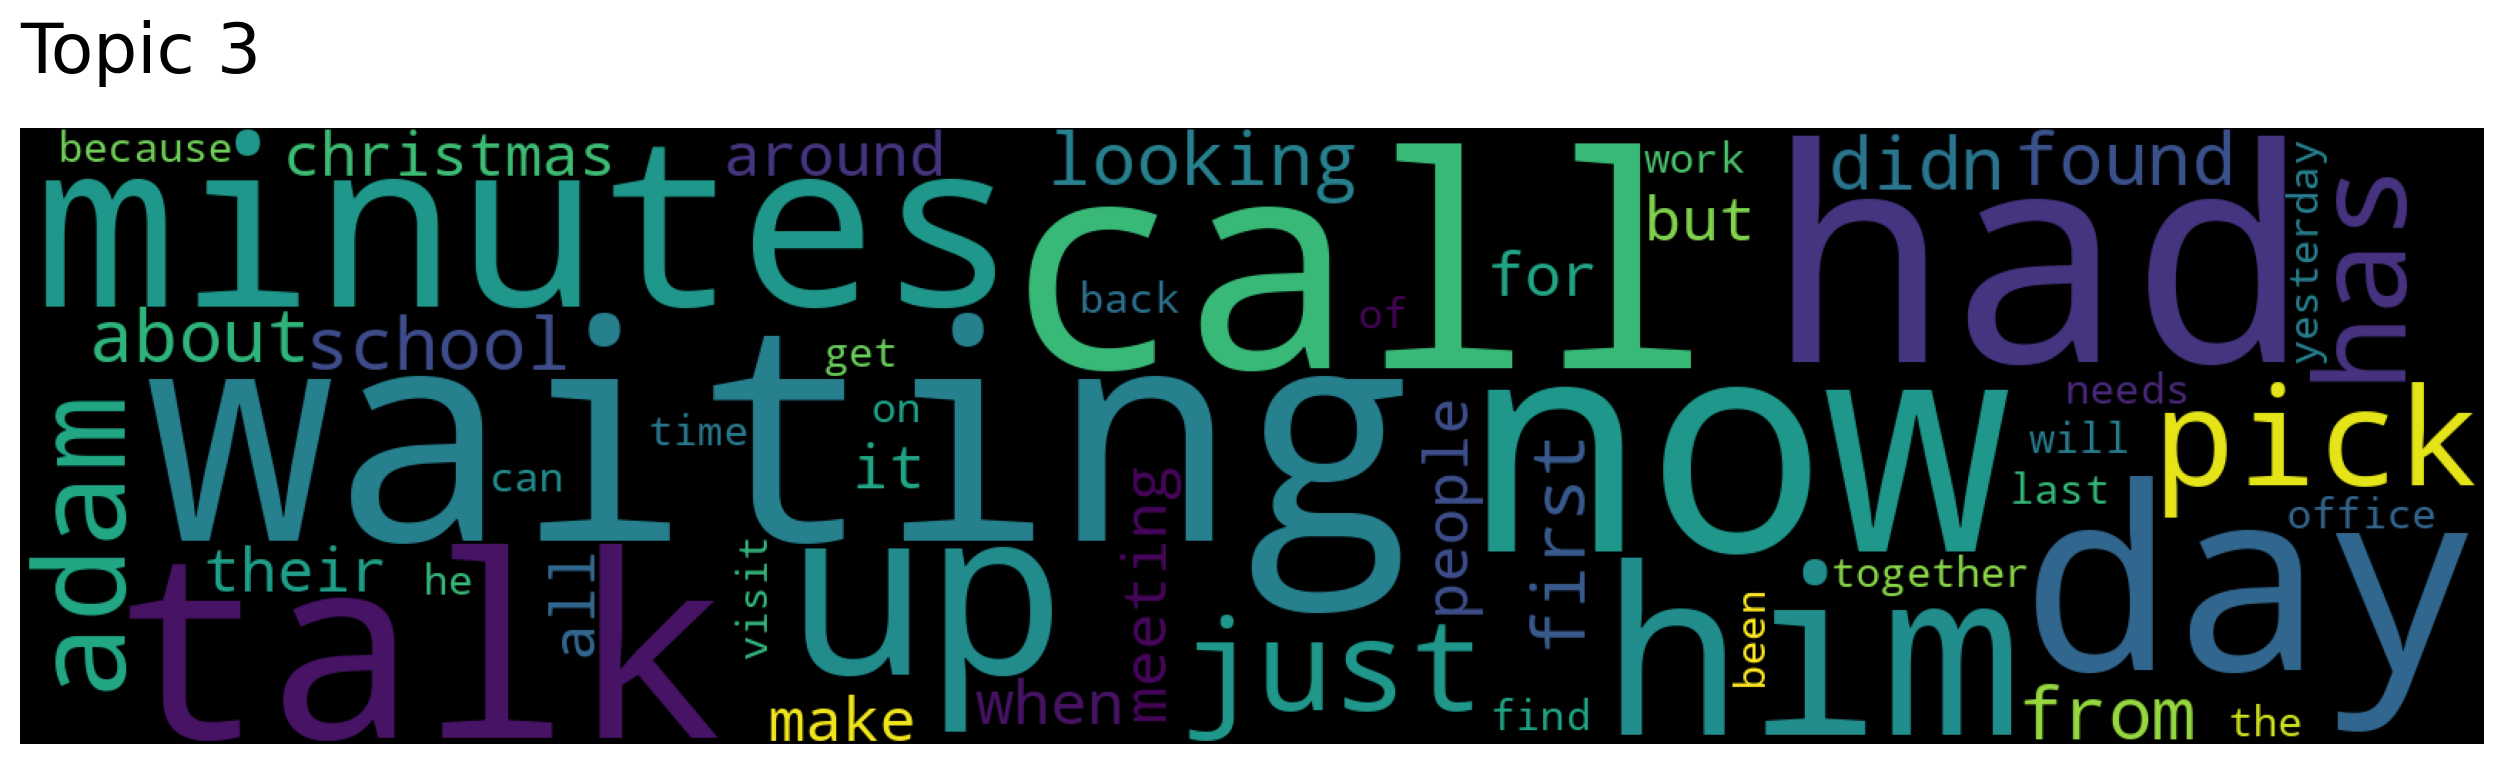

In [12]:
model.generate_topic_wordcloud(3)

Look at documents aligning with a topic

In [13]:
model.search_documents_by_topic(topic_num=0, num_docs=5)

(array(['Karly likes the red dress Major wore yesterday.',
        'Toby likes his workplace.', 'Denise kissed Paul.',
        'Greg and Maria went to Trattoria da Carlo yesterday and liked it.',
        "Tony and Paul aren't doing anything special."], dtype=object),
 array([0.94176704, 0.93075323, 0.919578  , 0.91230947, 0.9107101 ],
       dtype=float32),
 array([2585, 1612, 2640,  560,  799]))



* Topic 0: mark, paul, dinner
* Topic 1: office, tonight, after
* Topic 2: meeting, late, waiting
* Topic 3: pick, call, adam



